Será utilizado um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  
O intuito deste projeto é identificar o tipo de postagem.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## 1.0 Análise de consistência dos dados

In [1]:
import pandas as pd

In [51]:
df_exp = pd.read_csv('Dados/train/Train3Classes.csv')
df_subm = pd.read_csv('Dados/subm/Subm3classes.csv')

In [52]:
df_exp['tweet_text'] = df_exp['tweet_text'] + ' ' + df_exp['query_used']

In [53]:
print(df_exp.shape)
df_exp.sample(10).head()

(95000, 5)


,id,tweet_text,tweet_date,sentiment,query_used
30811,1049135041425629184,#SegundaDetremuraSDV Feliz aniversário pra mim...,Mon Oct 08 03:11:00 +0000 2018,1,:)
37121,1047027800174206977,saudade da bruna e pau no cu das clinica psiqu...,Tue Oct 02 07:37:35 +0000 2018,0,:(
88696,1049123085675352064,"@Duda__Ferraz Se precisar, a casa ta aberta p ...",Mon Oct 08 02:23:30 +0000 2018,1,:)
68706,1037707364248576000,#Vaga para Vendedor(a) detalhes e envio de cv ...,Thu Sep 06 14:21:29 +0000 2018,2,#oportunidade
55226,1047548847826915330,Índice de confiança do empresário do comércio ...,Wed Oct 03 18:08:02 +0000 2018,2,exame


In [4]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
print(df_subm.shape)
df_subm.sample(10).head()

(5000, 4)


,id,tweet_text,tweet_date,query_used
4511,1049426473931685891,Mapa das #eleicoes2018: infográficos mostram a...,Mon Oct 08 22:29:03 +0000 2018,jornaloglobo
682,1046968707430400002,"@394WK Não pode explodir, que saco! &gt;:(",Tue Oct 02 03:42:46 +0000 2018,:(
863,1049261841182932992,@hwang_beauty SLOGAN SANA ATE HAHDHSHS CHAROT :(,Mon Oct 08 11:34:51 +0000 2018,:(
3015,1046943616449568768,@laianebonatto :( será miga? obrigada ti amu,Tue Oct 02 02:03:04 +0000 2018,:(
1297,1049283214995546112,@CdeCiencia @Fantastiqvs @ldobartra @disfrutal...,Mon Oct 08 12:59:47 +0000 2018,:)


In [6]:
df_subm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [7]:
n_duplicated = df_exp.duplicated()
n_duplicated.sum()

0

In [8]:
n_duplicated = df_subm.duplicated()
n_duplicated.sum()

0

Não há dados duplicados nem nulos no dataset.

Será convertido todas as letras maiúsculas em minúsculas

In [54]:
for i in range(len(df_exp['tweet_text'])):
    df_exp['tweet_text'][i] = df_exp['tweet_text'][i].lower()

<ipython-input-54-fb23bb81bc6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['tweet_text'][i] = df_exp['tweet_text'][i].lower()


In [10]:
for i in range(len(df_subm['tweet_text'])):
    df_subm['tweet_text'][i] = df_subm['tweet_text'][i].lower()

<ipython-input-10-2ffc096f6078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subm['tweet_text'][i] = df_subm['tweet_text'][i].lower()


In [11]:
df_exp['tweet_text']

0        rio elege maior bancada policial de sua histór...
1        fiquei tão triste quando eu vi o preço da câme...
2        para theresa may, seu plano para o brexit é a ...
3        caralho eu quero proteger a danielly em um pot...
4                               @sicaetano_ viva o caos :)
                               ...                        
94995    cuba e defensor de direitos humanos se unem co...
94996    #oportunidade ➡️ venha fazer parte da nossa eq...
94997    @96syoo eu sei 😭😭 é por isso que significa mui...
94998              @louistsexhes n te conheço mas posta :d
94999                  meu deus :( https://t.co/blxazxzekq
Name: tweet_text, Length: 95000, dtype: object

In [12]:
df_subm['tweet_text']

0       apartamento vila mariana praça monteiro dos sa...
1       @fallencs @brasilgameshow quero 1x1 de scout. ...
2       mais uma analógica no correio à minha espera :...
3       em festa de posse como presidente do stf, toff...
4       @thethiagor @jubsilva @gscisa @grupomulheris a...
                              ...                        
4995    não é nada demais , apenas a verdade :) — oh.....
4996    veja o que é #fato ou #fake na entrevista de a...
4997    @nattvieiira de quem???? queria ver, eu sai po...
4998    assassin's creed origins: enfrentando os irmão...
4999    a gnt conversava muito mas paramos :( te acho ...
Name: tweet_text, Length: 5000, dtype: object

## 2.0 Análise exploratória

### 2.1 Verificar o balanceamento das classificações

In [10]:
df_exp['sentiment'].value_counts(dropna=False)

0    31696
1    31678
2    31626
Name: sentiment, dtype: int64

As classificações estão balanceadas

### 2.2 Wordcloud

In [19]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')

def plot_wordcloud(texts):
    stop_words = nltk.corpus.stopwords.words('portuguese') + ['https','co','t','d','p','D','pq','aí','tbm','acho','g1','pra','vc','to','vai','tava','tá','pro','q']
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, stopwords=stop_words)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp_si\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


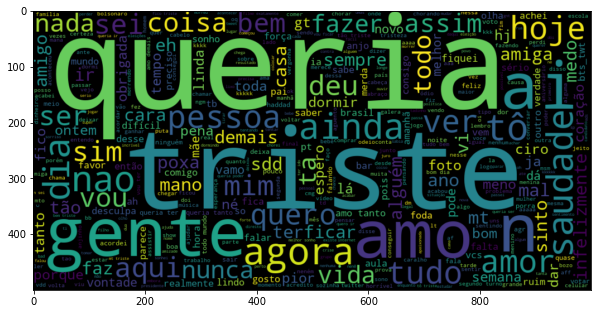

In [11]:
plot_wordcloud(df_exp.loc[df_exp['sentiment'] == 0, 'tweet_text'])

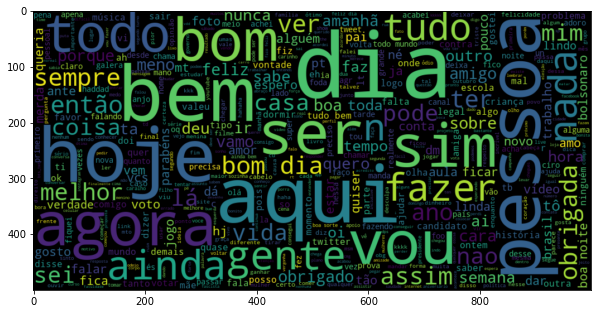

In [12]:
plot_wordcloud(df_exp.loc[df_exp['sentiment'] == 1, 'tweet_text'])

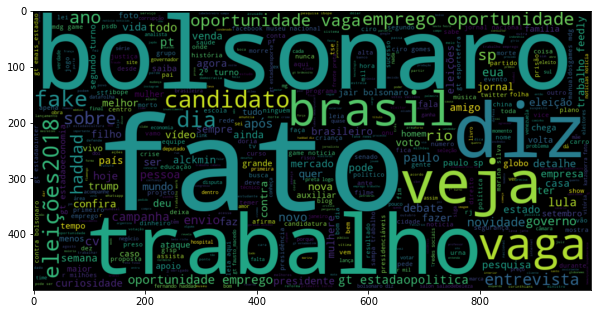

In [13]:
plot_wordcloud(df_exp.loc[df_exp['sentiment'] == 2, 'tweet_text'])

### 2.3 Análise Temporal

In [14]:
df_exp['date'] = pd.to_datetime(df_exp['tweet_date']).dt.strftime('%Y%m%d')

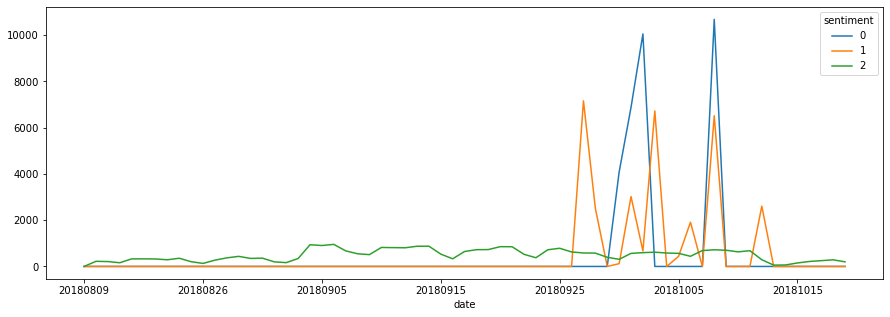

In [15]:
from matplotlib import pyplot as plt

df_hist = df_exp.groupby(['date', 'sentiment'])[['tweet_date']].count().reset_index()

pivot = pd.pivot_table(df_hist, values='tweet_date', index='date', columns='sentiment').fillna(0)

pivot.plot(figsize=(15, 5))

plt.show()

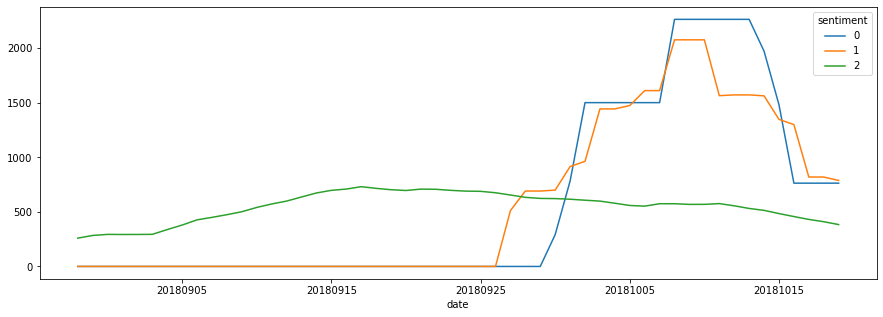

In [16]:
for coluna in pivot.columns:
    pivot[coluna] = pivot[coluna].rolling(14).mean()
    
pivot.plot(figsize=(15, 5))

plt.show()

Percebe-se que começou a ocorrer comentários bons e ruins no final do mês de setembro

## 3.0 Pré-processamento e transformações

Apesar de o dataset mostrar um aumento de tweets positivos/negativos durante a eleição, foi decidido separar o modelo aleatoriamente pelo fato de que sempre haverá comentários dos dois extremos durante o ano inteiro, seja por qualquer acontecimento que ocorra.

In [55]:
from sklearn.model_selection import train_test_split

df_experiment, df_test = train_test_split(df_exp, test_size = 10000)

print(df_experiment.shape)
print(df_test.shape)

(85000, 5)
(10000, 5)


In [56]:
X = df_experiment['tweet_text']
y = df_experiment['sentiment']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.15, random_state=42)
                                                      
print(X_train.shape)
print(X_valid.shape)

(72250,)
(12750,)


In [20]:
stop_words = nltk.corpus.stopwords.words('portuguese') + ['https','co','t','d','p','D','pq','aí','tbm','acho','g1','pra','vc','to','vai','tava','tá','pro','q']

### 3.1 Bag of Words

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words=stop_words)

vectorizer.fit(X_train)

CountVectorizer(max_features=1000,
                stop_words=['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em',
                            'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se',
                            'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
                            'ao', 'ele', 'das', 'à', 'seu', 'sua', ...])

In [118]:
X_train_transformed = vectorizer.transform(X_train).toarray()

print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()

print(X_valid_transformed.shape)

(72250, 1000)
(12750, 1000)


### 3.2 TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000, stop_words=stop_words)

vectorizer.fit(X_train)

TfidfVectorizer(max_features=2000,
                stop_words=['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em',
                            'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se',
                            'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
                            'ao', 'ele', 'das', 'à', 'seu', 'sua', ...])

In [83]:
X_train_transformed = vectorizer.transform(X_train).toarray()

print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()

print(X_valid_transformed.shape)

(72250, 2000)
(12750, 2000)


### 3.3 Word2Vec

In [15]:
from gensim.utils import simple_preprocess

def tokenize(text):
    return simple_preprocess(text, min_len=1)

from tqdm import tqdm
import numpy as np

def to_word_vector(words, w2v):

    vectors = []

    for word in words:
        vectors.append(w2v.wv[word] if word in w2v.wv.key_to_index else np.zeros(w2v.vector_size))
    
    if not vectors:
        vectors.append(np.zeros(w2v.vector_size))
    
    return np.mean(vectors, axis=0)

def embeddings(x, w2v):
    x = x.copy()

    x = x.apply(tokenize)

    x = np.vstack([[to_word_vector(sentences, w2v)] for sentences in tqdm(x)])

    return x

In [16]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
        sentences=X_train.apply(
            lambda t: tokenize(t)
        ),
         vector_size=300,
         window=5,
         min_count=1,
         workers=4
    )

In [17]:
X_train_transformed = embeddings(X_train, model_w2v)

X_valid_transformed = embeddings(X_valid, model_w2v)

100%|██████████| 12750/12750 [00:01<00:00, 6575.86it/s]


## 4.0 Treinamento do modelo

### 4.1 Funções úteis

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para gerar as métricas de avaliação
def metrics(y_train, y_train_pred, y_valid, y_valid_pred, average):

    acc_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average=average)

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    f1_valid = f1_score(y_valid, y_valid_pred, average=average)

    print(f'Treino:\nAcc: {acc_train:.2f}, F1: {f1_train:.2f}')
    print(f'Validação:\nAcc: {acc_valid:.2f}, F1: {f1_valid:.2f}')

In [30]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Função para gerar e plotar a matriz de confusão
def plot_cm(y, y_pred, names):
    
    cm = confusion_matrix(y, y_pred)

    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=names)

    fig.set_size_inches(8, 8)

    plt.show()

Obs: Será utilizado como métrica de avaliação a Acurácia e o F1-Score, o hiperparâmetro 'average' do F1 será 'macro' a fim de buscar a media sem peso de todas as classificações

### 4.2 Naive Bayes

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
modelo = MultinomialNB()

In [208]:
modelo.fit(X_train_transformed, y_train)

MultinomialNB()

In [209]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(72250,) (12750,)


In [210]:
metrics(y_train, y_train_pred, y_valid, y_valid_pred, 'macro')

Treino:
Acc: 0.77, F1: 0.77
Validação:
Acc: 0.76, F1: 0.76


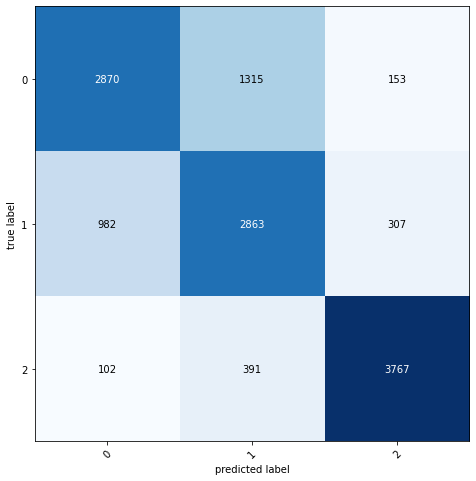

In [124]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

### 4.3 Random Forest

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier()

parameters = {
    'n_estimators': [500, 1000],
    'criterion': ['gini','entropy'],
    'max_depth': [None, 1, 2],
    'min_samples_leaf': [1,2]
}

clf = GridSearchCV(modelo_rf, parameters, verbose=3, scoring='f1_macro', cv=3)

clf.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=500; total time=13.6min
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=500; total time=18.2min
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=500; total time=19.3min
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=1000; total time=33.2min
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=1000; total time=28.2min
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, n_estimators=1000; total time=27.9min
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, n_estimators=500; total time=13.3min
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, n_estimators=500; total time=13.2min
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=2, n_estimators=500; total time=13.6min
[CV 1/3] END crite

In [ ]:
clf.best_params_

In [ ]:
modelo_rf = RandomForestClassifier(**clf.best_params_)

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=1, random_state=12)

In [212]:
modelo_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=12)

In [213]:
y_train_pred = modelo_rf.predict(X_train_transformed)

y_valid_pred = modelo_rf.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(72250,) (12750,)


In [214]:
metrics(y_train, y_train_pred, y_valid, y_valid_pred, 'macro')

Treino:
Acc: 0.67, F1: 0.67
Validação:
Acc: 0.66, F1: 0.66


In [ ]:
plot_cm(y_train, y_train_pred, modelo_rf.classes_)

In [ ]:
plot_cm(y_valid, y_valid_pred, modelo_rf.classes_)

### 4.4 LightGBM

In [24]:
from lightgbm import LGBMClassifier

In [94]:
modelo_gbm = LGBMClassifier()

parameters = {
    'max_depth': [5, 7, 9],
    'n_estimators': [80, 90, 100],
    'learning_rate': [0.4, 0.5, 0.7, 0.9],
    'is_unbalance': [True, False]
}

clf = GridSearchCV(modelo_gbm, parameters, verbose=3, scoring='f1_macro', cv=3)

clf.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=80; total time=   3.0s
[CV 2/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=80; total time=   3.0s
[CV 3/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=80; total time=   3.4s
[CV 1/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=90; total time=   3.4s
[CV 2/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=90; total time=   3.1s
[CV 3/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=90; total time=   3.5s
[CV 1/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=100; total time=   3.5s
[CV 2/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=100; total time=   3.3s
[CV 3/3] END is_unbalance=True, learning_rate=0.4, max_depth=5, n_estimators=100; total time=   3.3s
[CV 1/3] END is_unbalance=True, lea

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'is_unbalance': [True, False],
                         'learning_rate': [0.4, 0.5, 0.7, 0.9],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [80, 90, 100]},
             scoring='f1_macro', verbose=3)

In [95]:
clf.best_params_

{'is_unbalance': True,
 'learning_rate': 0.5,
 'max_depth': 9,
 'n_estimators': 90}

In [96]:
modelo_gbm = LGBMClassifier(**clf.best_params_)

In [84]:
modelo_gbm = LGBMClassifier(max_depth=2,n_estimators=200,learning_rate=0.8,is_unbalance=True)

In [85]:
modelo_gbm.fit(X_train_transformed, y_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.8, max_depth=2,
               n_estimators=200)

In [86]:
y_train_pred = modelo_gbm.predict(X_train_transformed)

y_valid_pred = modelo_gbm.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(72250,) (12750,)


In [87]:
metrics(y_train, y_train_pred, y_valid, y_valid_pred, 'macro')

Treino:
Acc: 0.83, F1: 0.83
Validação:
Acc: 0.81, F1: 0.81


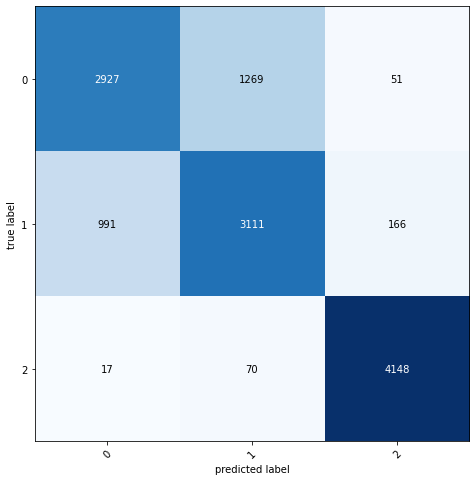

In [101]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

## 5.0 Resultados

### 5.1 Bag of Words

#### LightGBM

Treino:

    Acc: 0.78, F1: 0.78
Validação:

    Acc: 0.76, F1: 0.76

#### Naive Bayes

Treino:
    
    Acc: 0.77, F1: 0.76
Validação:

    Acc: 0.76, F1: 0.75

#### Random Forest

Treino:

    Acc: 0.78, F1: 0.78
Validação:

    Acc: 0.75, F1: 0.76

### 5.2 Word2Vec

#### LightGBM

Treino:

    Acc: 0.83, F1: 0.83
Validação:

    Acc: 0.81, F1: 0.81

#### Random Forest

Treino:

    Acc: 0.77, F1: 0.77
Validação:
    
    Acc: 0.75, F1: 0.75

### 5.3 TF-IDF

#### LightGBM

Treino:

    Acc: 0.83, F1: 0.83
Validação:

    Acc: 0.81, F1: 0.81

#### Naive Bayes

Treino:

    Acc: 0.77, F1: 0.77
Validação:

    Acc: 0.76, F1: 0.76

#### Random Forest

Treino:

    Acc: 0.67, F1: 0.67
Validação:

    Acc: 0.66, F1: 0.66

#### A técnica NLP e o modelo escolhido foram, respectivamente, TF-IDF e LightGBM.

## 6.0 Inferência na base teste

In [88]:
X_test = df_test['tweet_text']
y_test = df_test['sentiment']

In [89]:
X_test_transformed = vectorizer.transform(X_test).toarray()

In [90]:
y_test_pred = modelo_gbm.predict(X_test_transformed)

In [91]:
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'Acc: {acc_test:.2f}, F1: {f1_test:.2f}')

Acc: 0.80, F1: 0.79


## 7.0 Inferência na base de submissão

In [92]:
X = df_subm['tweet_text']

In [93]:
X_transformed = vectorizer.transform(X).toarray()

In [94]:
y_pred = modelo_gbm.predict(X_transformed)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [95]:
df_subm['sentiment'] = y_pred
df_subm.head()

,id,tweet_text,tweet_date,query_used,sentiment
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:),1
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:),0
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:),1
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha,2
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:),1


In [96]:
df_subm.to_csv('df_subm_updated.csv', index=False)

## 8.0 Notas e Conclusão

O dataset não possuía dados faltantes ou duplicados. Para fazer um tratamento na base de teste, utilizou-se o WordCloud para verificar as principais palavras que aparecem no dataset em determinada classificação. Sendo assim, foi possível aplicar algumas StopWords para otimizar o modelo final.

Foram testados diversas técnicas e modelos diferentes. Com o GridSearch utilizado no RandomForest e LightGBM, houve muito overfitting, dessa forma decidiu-se selecionar os hiperparâmetros manualmente até que consiga um resultado satisfatório.

Os modelos foram treinados com apenas a coluna 'tweet_text' e depois com a concatenação das colunas 'tweet_text' e 'query_used'. Obteve-se melhores resultados com a concatenação das duas colunas

Para a escolha da técnica e do modelo, foi levado em conta três aspectos:
- Os quais obtiveram melhores resultados;
- Modelo e técnica mais simples de ser utilizado;
- Tempo de processo.

Dessa forma, a técnica TF-IDF juntamente com o modelo LightGBM teve melhor performance, sendo ambos os escolhidos.